<a href="https://colab.research.google.com/github/alatieh/Growing-season-length/blob/backups/Growing_season_length_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Growing season length is an important factor that affects the productivity and diversity of crops and plants. It is defined as the period of the year when the local conditions, such as temperature, rainfall, and daylight, allow normal plant growth. The length of the growing season varies from place to place, depending on the latitude, elevation, and climate of the region. Generally, the closer a place is to the equator, the longer the growing season, and vice versa. The higher a place is above sea level, the shorter the growing season, and vice versa.

According to National Geographic, most crops need a growing season of at least 90 days. However, some crops can grow in shorter or longer periods, depending on their genetic adaptation and cultivation methods. For example, coffee, which grows in tropical climates, has a varied growing season that can be interrupted by rainy or dry seasons. In contrast, some crops can grow in cold climates with short growing seasons by using techniques such as greenhouses or row covers.

The growing season is influenced by global and regional factors, such as climate change, weather patterns, soil quality, water availability, and human activities. Changes in any of these factors can have significant impacts on the length and quality of the growing season, and consequently on the food security and biodiversity of the world.

The growing season can be determined previously by two methods: by measuring the average number of days between the last frost in spring and the first severe frost in autumn; or by measuring the average number of days that the temperature rises high enough for a particular crop to sprout and grow. Both methods are useful for estimating the suitability of a region for growing certain crops and plants. 

One of the limitations of using temperature as a proxy for the growing season is that it does not account for other factors that affect plant growth, such as CO2 level and water availability.
These factors affect each other in complex and dynamic ways. For example, in Wyoming, the season starts when the temperature rises, but ends when the water supply is depleted, according to [Steven Running](https://www.nature.com/articles/nature.2014.15081). According to a study by Nicola Jones ([2014](https://www.nature.com/articles/nature.2014.15081)), elevated CO2 levels alone (1.5 times higher than today's level) can lengthen the growing season by two weeks. Therefore, we need to measure the result instead of the reason. With measurnig the result, I mean measurnig the resulted change in CO2 level and fluctuations instead of measurnig one or two factors.


We present a novel method for estimating the length of the growing season based on the CO2 curves after removing the annual trend caused by fossil fuel emissions. The resulting curve is a sinusoidal curve that reflects two natural processes: the growth and the decay of vegetation. We define the growing season as the period when the CO2 decrease due to vegetation growth is greater than the CO2 increase due to vegetation decay. Conversely, we define the Decay season as the period when the CO2 increase due to vegetation decay is greater than the CO2 decrease due to vegetation growth. Therefore, we use the CO2 decrease as an indicator of the growing season.


![](https://images.theconversation.com/files/323497/original/file-20200327-146662-ou6y42.jpg)

Foig. The graph illustrates how atmospheric CO2 concentration changes with growing season length. As the growing season becomes longer, more CO2 is absorbed by plants. (Alemu Gonsamo from the [theconversation](https://theconversation.com/longer-growing-seasons-have-a-limited-effect-on-combating-climate-change-130384))
The main question is how the increase in growing season will impact climate. According to Gonsamo et al. ([2017](https://onlinelibrary.wiley.com/doi/10.1111/gcb.13646)), there is a parallel warming-induced increase in both photosynthesis and respiration. Our approach and definition of growing season will directly address the climate issue because it measures the CO2 flux.


Previous study from [EPA](https://www.epa.gov/climate-indicators/climate-change-indicators-length-growing-season)
![](https://www.epa.gov/sites/default/files/2021-04/growing-season_figure1_2021.png)

Fig. Length of Growing Season in the Contiguous 48 States, 1895–2020

The graph shows how the Length of Growing Season varies from the long-term average. For each year, the line represents the number of days shorter or longer than average. The line was smoothed using an 11-year moving average. This means that the value for each year is calculated by taking the average of the values for that year and the five previous and five following years. Choosing a different long-term average for comparison would not change the shape of the data over time, but it would shift the line up or down on the graph. An 11-year moving average is a common technique to reduce random fluctuations and highlight longer-term trends or cycles. Data source Kunkel, 2021

 Kunkel, K.E. 2021 update to data originally published in: Kunkel, K.E., D.R. Easterling, K. Hubbard, and K. Redmond. 2004. Temporal variations in frost-free season in the United States: 1895–2000. Geophys. Res. Lett. 31:L03201.

The Growing Season begins when the first leaves start to appear on [plants](https://theconversation.com/longer-growing-seasons-have-a-limited-effect-on-combating-climate-change-130384). Thirty-four years of satellite records reveal not only an earlier leaf-out, but also a shift in peak plant growth timing towards spring for plants growing north of the tropics, as in figure. 
![](https://onlinelibrary.wiley.com/cms/asset/b93ed01c-b2fc-40c6-98de-93015f7f8919/gcb14001-fig-0007-m.png)

Fig.The shift in land surface phenology of Northern Hemisphere extratropical terrestrial ecosystems. The projected change under future climate scenarios is predominantly towards earlier spring onset and longer growing season duration across most regions, except for some areas with water or temperature limitations. The study suggests that climate change has altered not only the onset but also the duration and intensity of plant growth in northern regions. This could have implications for ecosystem structure and function, carbon and water cycles, and biodiversity.Figure source [Gonsamo, et al. 2018](https://onlinelibrary.wiley.com/doi/10.1111/gcb.14001)



# Importing data

## 1.1- Importing Tasmania data (Kennaook / Cape Grim)

 According to [Csiro](https://www.csiro.au/greenhouse-gases/) "Air masses arriving at the Kennaook / Cape Grim station from between 190-280 degrees have typically travelled for many thousands of kilometres across the Southern Ocean. This air is free from recent human and terrestrial influences and is very well mixed, meaning it represents the background or 'baseline' atmospheric composition for the mid-latitudes of the Southern Hemisphere. The long-term changes in baseline atmospheric composition are the principal drivers of climate change."

![](https://www.csiro.au/-/media/OnA/Images/Map-Australia-Cape-Grim.png?mw=410&hash=D93E49160C369610C066CFCE48E0441E)



Station [Specifications](http://www.bom.gov.au/inside/cgbaps/specifications.shtml) 

Latitude	40° 41' 00" (40.683°) S

Longitude	144° 41' 22" (144.689°) E (Datum: GDA94)

Elevation	94m (roof deck & nearby ground)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Cape_Grim_CO2_url= 'https://capegrim.csiro.au/GreenhouseGas/data/CapeGrim_CO2_data_download.csv'
Cape_Grim_CO2 = pd.read_csv(Cape_Grim_CO2_url, skiprows=24, usecols=[0,1,2,4,5],dtype={'YYYY':str, 'MM':str, 'DD':str, 'CO2':np.float64}, encoding='ISO-8859-1')

Cape_Grim_CO2.dropna(inplace=True)
Cape_Grim_CO2['date'] = Cape_Grim_CO2['YYYY'].astype(str) +'-'+ Cape_Grim_CO2['MM'].astype(str) + '-' + Cape_Grim_CO2['DD'].astype(str) 
Cape_Grim_CO2['date'] = pd.to_datetime(Cape_Grim_CO2['date'])
Cape_Grim_CO2.set_index('date', inplace =True, drop=True)
Cape_Grim_CO2 = Cape_Grim_CO2.drop(['YYYY','MM','DD'], axis=1)
Cape_Grim_CO2.columns =['CO2','std']
Cape_Grim_CO2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 563 entries, 1976-05-15 to 2023-03-15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     563 non-null    float64
 1   std     563 non-null    float64
dtypes: float64(2)
memory usage: 13.2 KB


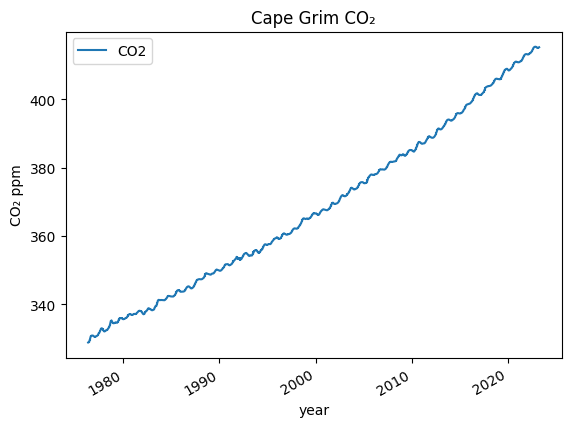

In [ ]:
Cape_Grim_CO2.plot(title="Cape Grim CO\u2082", xlabel="year", ylabel="CO\u2082 ppm",yerr='std' );


#References 

<br> **Gonsamo**, A., Chen, J. M., & Ooi, Y. W. ([2018](https://onlinelibrary.wiley.com/doi/10.1111/gcb.14001)). Peak season plant activity shift towards spring is reflected by increasing carbon uptake by extratropical ecosystems. Global change biology, 24(5), 2117-2128.
<br> **Gonsamo**, A., D'Odorico, P., Chen, J. M., Wu, C., & Buchmann, N. ([2017](https://onlinelibrary.wiley.com/doi/10.1111/gcb.13646)). Changes in vegetation phenology are not reflected in atmospheric CO 2 and 13C/12C seasonality. Global change biology, 23(10), 4029-4044.
<br> **Jones**, N. ([2014](https://www.nature.com/articles/nature.2014.15081)). CO makes growing seasons longer.
<br> **Theconversation** retrieved from the [website](https://theconversation.com/longer-growing-seasons-have-a-limited-effect-on-combating-climate-change-130384)  15-5-2023